# Installation

In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

# Data

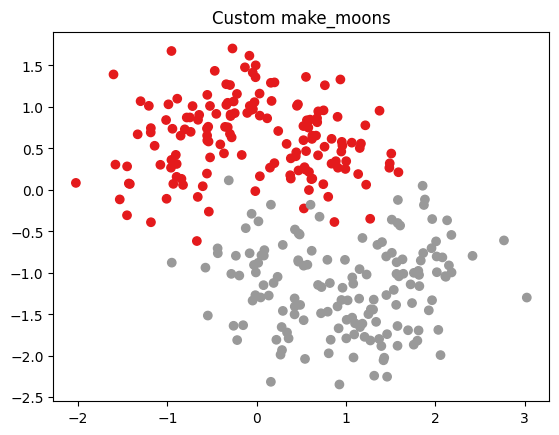

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def make_moons_manual(n_samples=100, noise=0.1):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    # First half moon
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    
    # Second half moon
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = -np.sin(np.linspace(0, np.pi, n_samples_in)) - 0.5

    X = np.vstack([
        np.stack([outer_circ_x, outer_circ_y], axis=1),
        np.stack([inner_circ_x, inner_circ_y], axis=1)
    ])
    y = np.array([0] * n_samples_out + [1] * n_samples_in)

    # Add noise
    X += np.random.normal(scale=noise, size=X.shape)
    
    return X, y

# Example usage
X, y = make_moons_manual(n_samples=300, noise=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.title("Custom make_moons")
plt.show()


# Machine Gnostics Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from machinegnostics.models.classification import LogisticRegressor
from machinegnostics.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score


/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


# Logistic Regressor - Training - Gnostic Sigmoid probability

In [3]:
# --- Gnostic Logistic Regression (with polynomial features for nonlinearity) ---
# using gnostic influenced sigmoid function for probability estimation
model = LogisticRegressor(degree=3,verbose=True, early_stopping=True, proba='sigmoid', tol=0.1, max_iter=100)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

2025-09-26 21:56:05,550 | LogisticRegressor | INFO | LogisticRegressor initialized:
2025-09-26 21:56:05,552 | LogisticRegressor | INFO | DataProcessLayerBase initialized.
2025-09-26 21:56:05,552 | LogisticRegressor | INFO | DataProcessLogisticRegressor initialized.
2025-09-26 21:56:05,553 | LogisticRegressor | INFO | LogisticRegressor initialized.
2025-09-26 21:56:05,553 | LogisticRegressor | INFO | Starting fit process for LogisticRegressor.
2025-09-26 21:56:05,553 | LogisticRegressor | INFO | Starting fit process for DataProcessLogisticRegressor.
2025-09-26 21:56:05,554 | LogisticRegressor | INFO | Starting fit input/output processing.
2025-09-26 21:56:05,554 | LogisticRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 21:56:05,554 | LogisticRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 21:56:05,555 | LogisticRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2025-09-26 21:56:05,555 | Log

# Prediction and Metrics

2025-09-26 21:56:11,354 | LogisticRegressor | INFO | Calculating predicted probabilities with LogisticRegressor.
2025-09-26 21:56:11,354 | LogisticRegressor | INFO | Calculating predicted probabilities with DataProcessLogisticRegressor.
2025-09-26 21:56:11,354 | LogisticRegressor | INFO | Starting predict input/output processing.
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Calculating predicted probabilities with InterfaceLogisticRegressor.
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Calculating predicted probabilities with Logistic Regressor.
2025-09-26 21:56:11,355 | LogisticRegressor | INFO | Generating polynomial features of degree

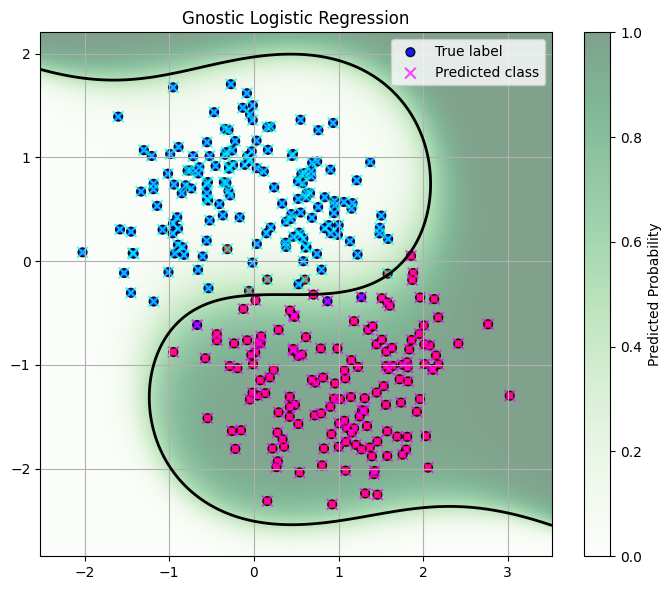

Gnostic Logistic Regression Evaluation:
Accuracy: 0.9733333333333334
Precision: 0.9797297297297297
Recall: 0.9666666666666667
F1-score: 0.9731543624161074

Confusion Matrix:
 [[147   3]
 [  5 145]]

Classification Report:
 Class           Precision    Recall  F1-score   Support
0                    0.97      0.98      0.97       150
1                    0.98      0.97      0.97       150
Avg/Total            0.97      0.97      0.97       300



In [4]:
# --- Plot probability contour and predictions ---
fig, ax = plt.subplots(figsize=(7, 6))

def plot_proba_contour(ax, model, X, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict_proba(grid)
    zz = zz.reshape(xx.shape)

    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

plot_proba_contour(ax, model, X, "Gnostic Logistic Regression")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

# History

# Logistic Regressor - Training - Gnostic probability

In [8]:
# --- Gnostic Logistic Regression (with polynomial features for nonlinearity) ---
# using gnostic probability estimation
model = LogisticRegressor(degree=3,verbose=True, early_stopping=True, max_iter=100, proba='gnostic', tol=0.1)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

2025-09-26 21:57:37,946 | LogisticRegressor | INFO | LogisticRegressor initialized:
2025-09-26 21:57:37,947 | LogisticRegressor | INFO | DataProcessLayerBase initialized.
2025-09-26 21:57:37,948 | LogisticRegressor | INFO | DataProcessLogisticRegressor initialized.
2025-09-26 21:57:37,949 | LogisticRegressor | INFO | LogisticRegressor initialized.
2025-09-26 21:57:37,949 | LogisticRegressor | INFO | Starting fit process for LogisticRegressor.
2025-09-26 21:57:37,950 | LogisticRegressor | INFO | Starting fit process for DataProcessLogisticRegressor.
2025-09-26 21:57:37,950 | LogisticRegressor | INFO | Starting fit input/output processing.
2025-09-26 21:57:37,950 | LogisticRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 21:57:37,950 | LogisticRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 21:57:37,951 | LogisticRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2025-09-26 21:57:37,951 | Log

# Prediction and Metrics

2025-09-26 21:59:09,758 | LogisticRegressor | INFO | Calculating predicted probabilities with LogisticRegressor.
2025-09-26 21:59:09,759 | LogisticRegressor | INFO | Calculating predicted probabilities with DataProcessLogisticRegressor.
2025-09-26 21:59:09,759 | LogisticRegressor | INFO | Starting predict input/output processing.
2025-09-26 21:59:09,760 | LogisticRegressor | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2025-09-26 21:59:09,760 | LogisticRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 21:59:09,760 | LogisticRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 21:59:09,760 | LogisticRegressor | INFO | Calculating predicted probabilities with InterfaceLogisticRegressor.
2025-09-26 21:59:09,761 | LogisticRegressor | INFO | Calculating predicted probabilities with Logistic Regressor.
2025-09-26 21:59:09,761 | LogisticRegressor | INFO | Generating polynomial features of degree

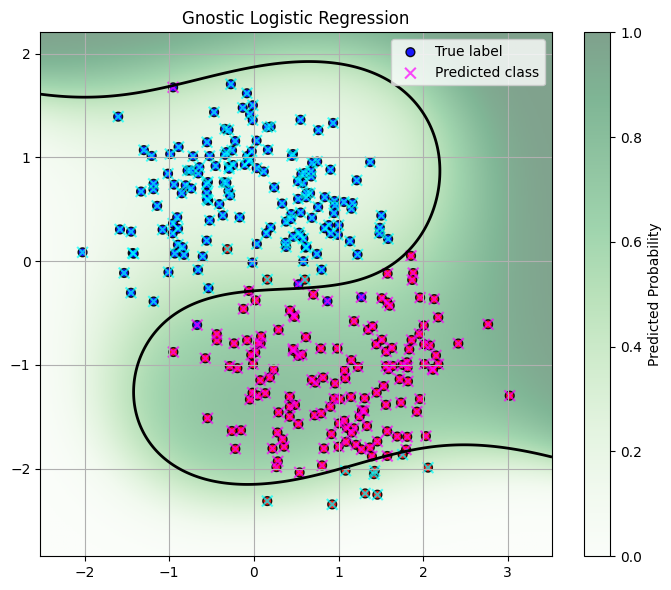

Gnostic Logistic Regression Evaluation:
Accuracy: 0.9433333333333334
Precision: 0.965034965034965
Recall: 0.92
F1-score: 0.9419795221843004

Confusion Matrix:
 [[145   5]
 [ 12 138]]

Classification Report:
 Class           Precision    Recall  F1-score   Support
0                    0.92      0.97      0.94       150
1                    0.97      0.92      0.94       150
Avg/Total            0.94      0.94      0.94       300



In [11]:
# --- Plot probability contour and predictions ---
fig, ax = plt.subplots(figsize=(7, 6))

def plot_proba_contour(ax, model, X, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict_proba(grid)
    zz = zz.reshape(xx.shape)

    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

plot_proba_contour(ax, model, X, "Gnostic Logistic Regression")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

# History